## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

anomaly
normal     285
anomaly     15
Name: count, dtype: int64


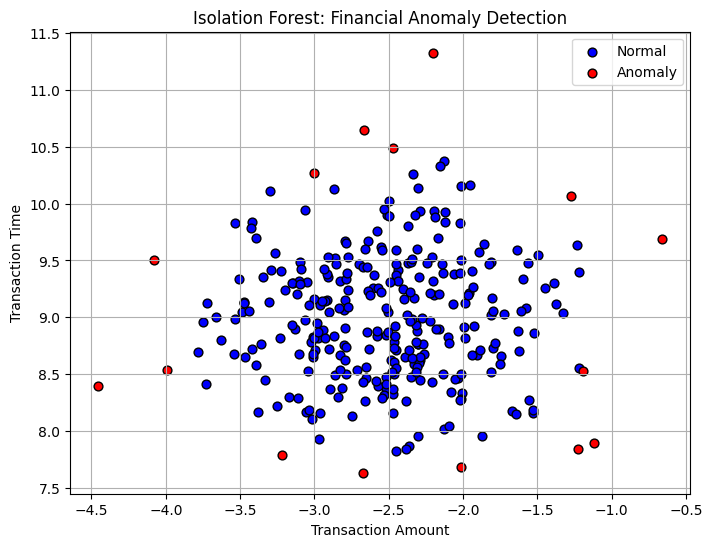

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

def detect_anomalies(df, contamination=0.05, random_state=42):
    """
    Detect anomalies in a DataFrame using Isolation Forest.

    Parameters:
        df (pd.DataFrame): Input DataFrame with numeric features.
        contamination (float): Proportion of outliers in the data.
        random_state (int): Random seed.

    Returns:
        pd.DataFrame: Original DataFrame with an added 'anomaly' column.
    """
    # Error Handling
    if df.isnull().values.any():
        raise ValueError("Input DataFrame contains null values.")
    if not all([np.issubdtype(dtype, np.number) for dtype in df.dtypes]):
        raise TypeError("All columns must be numeric.")
    if df.shape[0] < 10:
        raise ValueError("Insufficient number of samples to detect anomalies.")

    # Apply Isolation Forest
    model = IsolationForest(contamination=contamination, random_state=random_state)
    model.fit(df)
    preds = model.predict(df)
    df = df.copy()
    df['anomaly'] = np.where(preds == -1, 'anomaly', 'normal')
    return df

# Generate synthetic financial data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)
data = pd.DataFrame(X, columns=['Amount', 'Time'])

# Detect anomalies
try:
    result_df = detect_anomalies(data, contamination=0.05)
    print(result_df['anomaly'].value_counts())
except Exception as e:
    print("Error:", e)

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(result_df[result_df['anomaly'] == 'normal']['Amount'],
            result_df[result_df['anomaly'] == 'normal']['Time'],
            c='blue', label='Normal', edgecolor='k', s=40)
plt.scatter(result_df[result_df['anomaly'] == 'anomaly']['Amount'],
            result_df[result_df['anomaly'] == 'anomaly']['Time'],
            c='red', label='Anomaly', edgecolor='k', s=40)
plt.title("Isolation Forest: Financial Anomaly Detection")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Time")
plt.legend()
plt.grid(True)
plt.show()